In [3]:
#Importing required librarues

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
pd.set_option('display.max_columns', None)
import pickle
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
df = pd.read_csv("data/hypothyroid.csv")
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,negative


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [6]:
#Create a copy for better practice
data = df.copy()

In [7]:
#Shape of the data
data.shape

(3772, 30)

In [8]:
# Display all Columns
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [9]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,369,3003,769,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [10]:
#Checking for null values
data.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
Class                        0
dtype: int64

In [11]:
data.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'Class'],
      dtype='object')

In [12]:
#Checking for unique values in class column

data['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [13]:
n = len(data[data['Class'] == 'secondary_hypothyroid'])
print("No of secondary_hypothyroid in Dataset:",n)

n = len(data[data['Class'] == 'primary_hypothyroid'])
print("No of primary_hypothyroid in Dataset:",n)

n = len(data[data['Class'] == 'compensated_hypothyroid'])
print("No of compensated_hypothyroid in Dataset:",n)

n = len(data[data['Class'] == 'negative'])
print("No of negative in Dataset:",n)

No of secondary_hypothyroid in Dataset: 2
No of primary_hypothyroid in Dataset: 95
No of compensated_hypothyroid in Dataset: 194
No of negative in Dataset: 3481


In [14]:
#For checking unique value of every column
for column in data.columns:
    print(column,'--->', (data[column].unique()))

age ---> ['41' '23' '46' '70' '18' '59' '80' '66' '68' '84' '67' '71' '28' '65'
 '42' '63' '51' '81' '54' '55' '60' '25' '73' '34' '78' '37' '85' '26'
 '58' '64' '44' '48' '61' '35' '83' '21' '87' '53' '77' '27' '69' '74'
 '38' '76' '45' '36' '22' '43' '72' '82' '31' '39' '49' '62' '57' '1' '50'
 '30' '29' '75' '19' '7' '79' '17' '24' '15' '32' '47' '16' '52' '33' '13'
 '10' '89' '56' '20' '90' '40' '88' '14' '86' '94' '12' '4' '11' '8' '5'
 '455' '2' '91' '6' '?' '93' '92']
sex ---> ['F' 'M' '?']
on_thyroxine ---> ['f' 't']
query_on_thyroxine ---> ['f' 't']
on_antithyroid_medication ---> ['f' 't']
sick ---> ['f' 't']
pregnant ---> ['f' 't']
thyroid_surgery ---> ['f' 't']
I131_treatment ---> ['f' 't']
query_hypothyroid ---> ['f' 't']
query_hyperthyroid ---> ['f' 't']
lithium ---> ['f' 't']
goitre ---> ['f' 't']
tumor ---> ['f' 't']
hypopituitary ---> ['f' 't']
psych ---> ['f' 't']
TSH_measured ---> ['t' 'f']
TSH ---> ['1.3' '4.1' '0.98' '0.16' '0.72' '0.03' '?' '2.2' '0.6' '2.4' '1.1' 

In [15]:
col_name = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured']

for col in col_name:
    print(f"No.of 'f' and 't' values are in {col} column")
    print(f"No.of f value in {col} column : {len(data[data[col] == 'f'])}")
    print(f"No.of t value in {col} column : {len(data[data[col] == 't'])}", '\n', '---'*20)

No.of 'f' and 't' values are in on_thyroxine column
No.of f value in on_thyroxine column : 3308
No.of t value in on_thyroxine column : 464 
 ------------------------------------------------------------
No.of 'f' and 't' values are in query_on_thyroxine column
No.of f value in query_on_thyroxine column : 3722
No.of t value in query_on_thyroxine column : 50 
 ------------------------------------------------------------
No.of 'f' and 't' values are in on_antithyroid_medication column
No.of f value in on_antithyroid_medication column : 3729
No.of t value in on_antithyroid_medication column : 43 
 ------------------------------------------------------------
No.of 'f' and 't' values are in sick column
No.of f value in sick column : 3625
No.of t value in sick column : 147 
 ------------------------------------------------------------
No.of 'f' and 't' values are in pregnant column
No.of f value in pregnant column : 3719
No.of t value in pregnant column : 53 
 ---------------------------------

In [16]:
#Checking for '?' value in our data which are null values 

data.isin(['?']).sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
T4U_measured                    0
T4U                           387
FTI_measured                    0
FTI                           385
TBG_measured                    0
TBG                          3772
referral_source                 0
Class         

In [17]:
# we can see that for column 'TBG' all the values are missing. So we will drop this column as it is of no use to us.

data = data.drop(['TBG'], axis=1)

**Looking to the dataset, we can see that some columns are with true and false value are just the indication that whether the next column has values or not.**

In [18]:
data[['T4U_measured','T4U']] 

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
3767,f,?
3768,t,1.08
3769,t,1.07
3770,t,0.94


In [19]:
## Let's drop some unnecessary columns

data = data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],axis =1)

In [20]:
# Now let's replace the '?' values with nan value

for col in data.columns:
    count = data[col][data[col]=='?'].count()
    if count!=0:
        data[col] = data[col].replace('?',np.nan)  

In [21]:
# For rechecking 

for col in data.columns:
    count = data[col][data[col]=='?'].count()
    if count==0:
        print(col, data[col][data[col]=='?'].count())    

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
TSH 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


In [22]:
#Now ? is replaced with nan value. so checking for null value
data.isna().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH                          369
T3                           769
TT4                          231
T4U                          387
FTI                          385
referral_source                0
Class                          0
dtype: int64

In [23]:
#Now checking for datatypes of columns

data.dtypes

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH                          object
T3                           object
TT4                          object
T4U                          object
FTI                          object
referral_source              object
Class                        object
dtype: object

#### **As the datatype of all columns are object, so first we've to convert them.**

In [24]:
# Mapping the categorical column

data['sex'] = data['sex'].map({'F' : 0, 'M' : 1})

In [25]:
col_name = ['on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych',]

for col in col_name:
    if  len(data[col].unique())==2:
        data[col] = data[col].map({'f' : 0, 't' : 1})

In [27]:
# Referral source are not important as well so drop this from the given dataset
data.drop(['referral_source'],inplace=True, axis = 1)

In [28]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,negative
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,negative
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,negative
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,negative
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,negative


### **Encoding categorical columns**

In [29]:
data['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [30]:
# Converting categorical columns to Numerical columns
from sklearn.preprocessing import LabelEncoder

lblEn = LabelEncoder()

data['Class'] =lblEn.fit_transform(data['Class'])

In [31]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.3,2.5,125,1.14,109,1
1,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.1,2,102,NaN,NaN,1
2,46,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.98,NaN,109,0.91,120,1
3,70,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175,NaN,NaN,1
4,70,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61,0.87,70,1


In [32]:
from sklearn.impute import KNNImputer

imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)

# For imputing the missing values
new_array=imputer.fit_transform(data)

# convert the nd-array returned in the step above to a Dataframe
new_data=pd.DataFrame(data=np.round(new_array), columns=data.columns)

In [33]:
new_data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Class
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,125.0,1.0,109.0,1.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,102.0,1.0,108.0,1.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,109.0,1.0,120.0,1.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,175.0,1.0,177.0,1.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,61.0,1.0,70.0,1.0


In [36]:
new_data.shape

(3772, 22)

In [37]:
# Again removing the unecesary columns from the given dataset

new_data.drop(['query_on_thyroxine', 'sick', 'pregnant',
               'query_hypothyroid', 'query_hyperthyroid',],inplace = True, axis= 1)

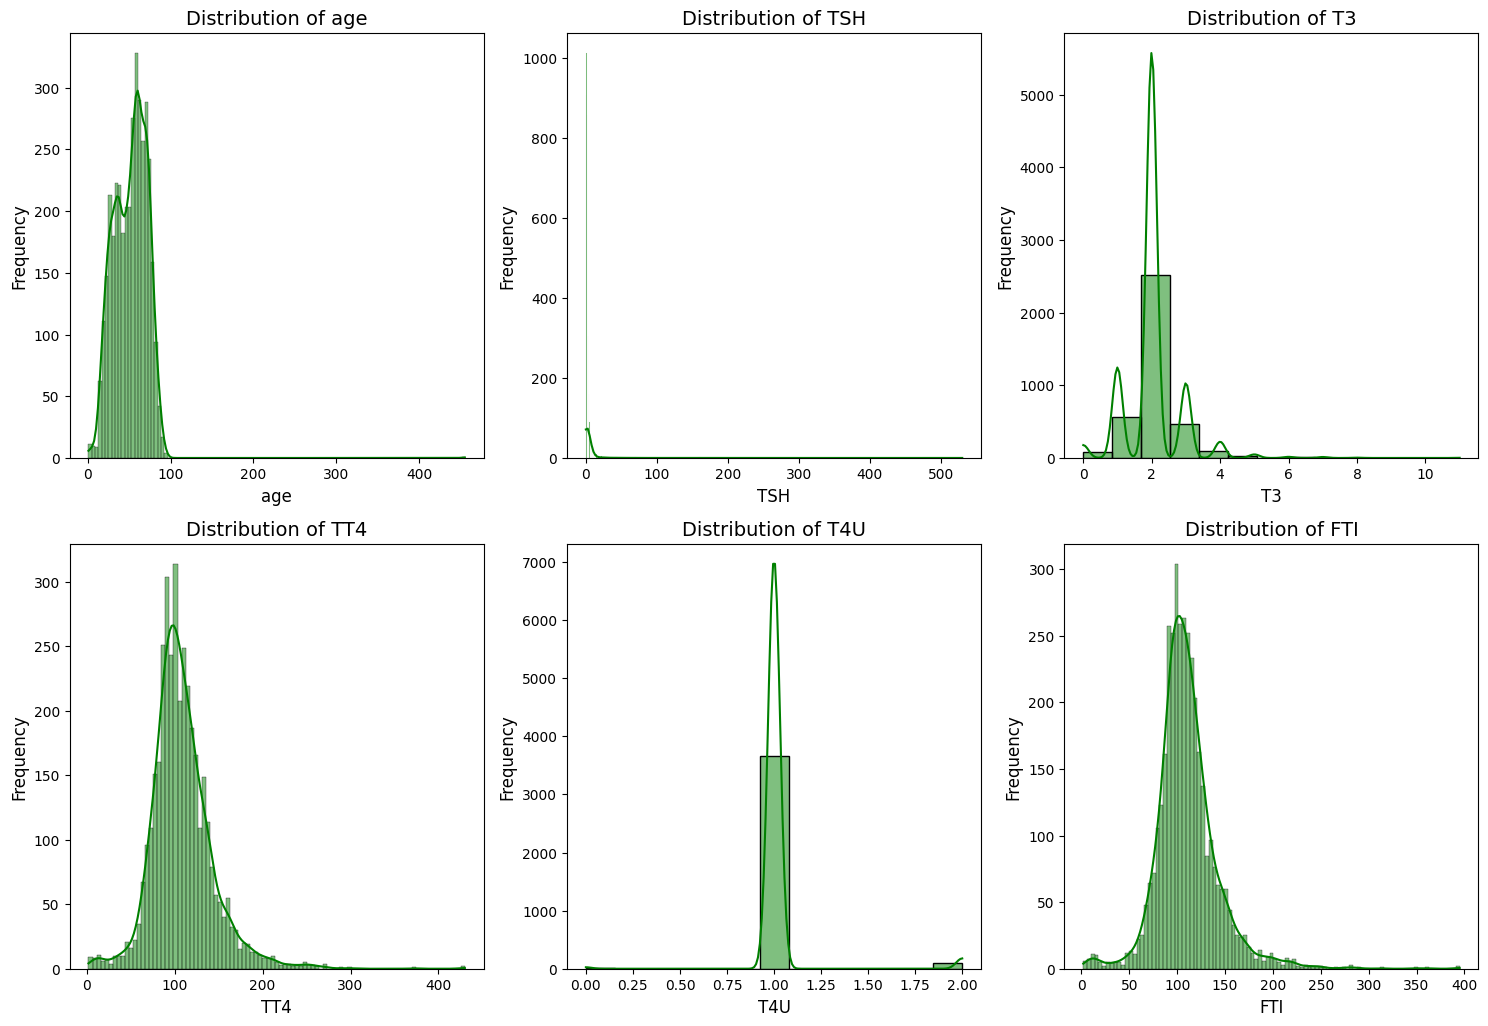

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']
plt.figure(figsize=(15, 15), facecolor='white')
plot_number = 1

for column in columns:
    ax = plt.subplot(3, 3, plot_number)
    sns.histplot(new_data[column], kde=True, color='green')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Distribution of {column}', fontsize=14)
    plot_number += 1

plt.tight_layout()
plt.show()


**The graphs for age, TSH and T3 looks heavely skewed towards left. Let's do some transformations to the data and see if it improves the plot.**

#### **Before doing log transformation , let's add 1 to each valuue in the column to handle exception when we try to find log of '0'.**


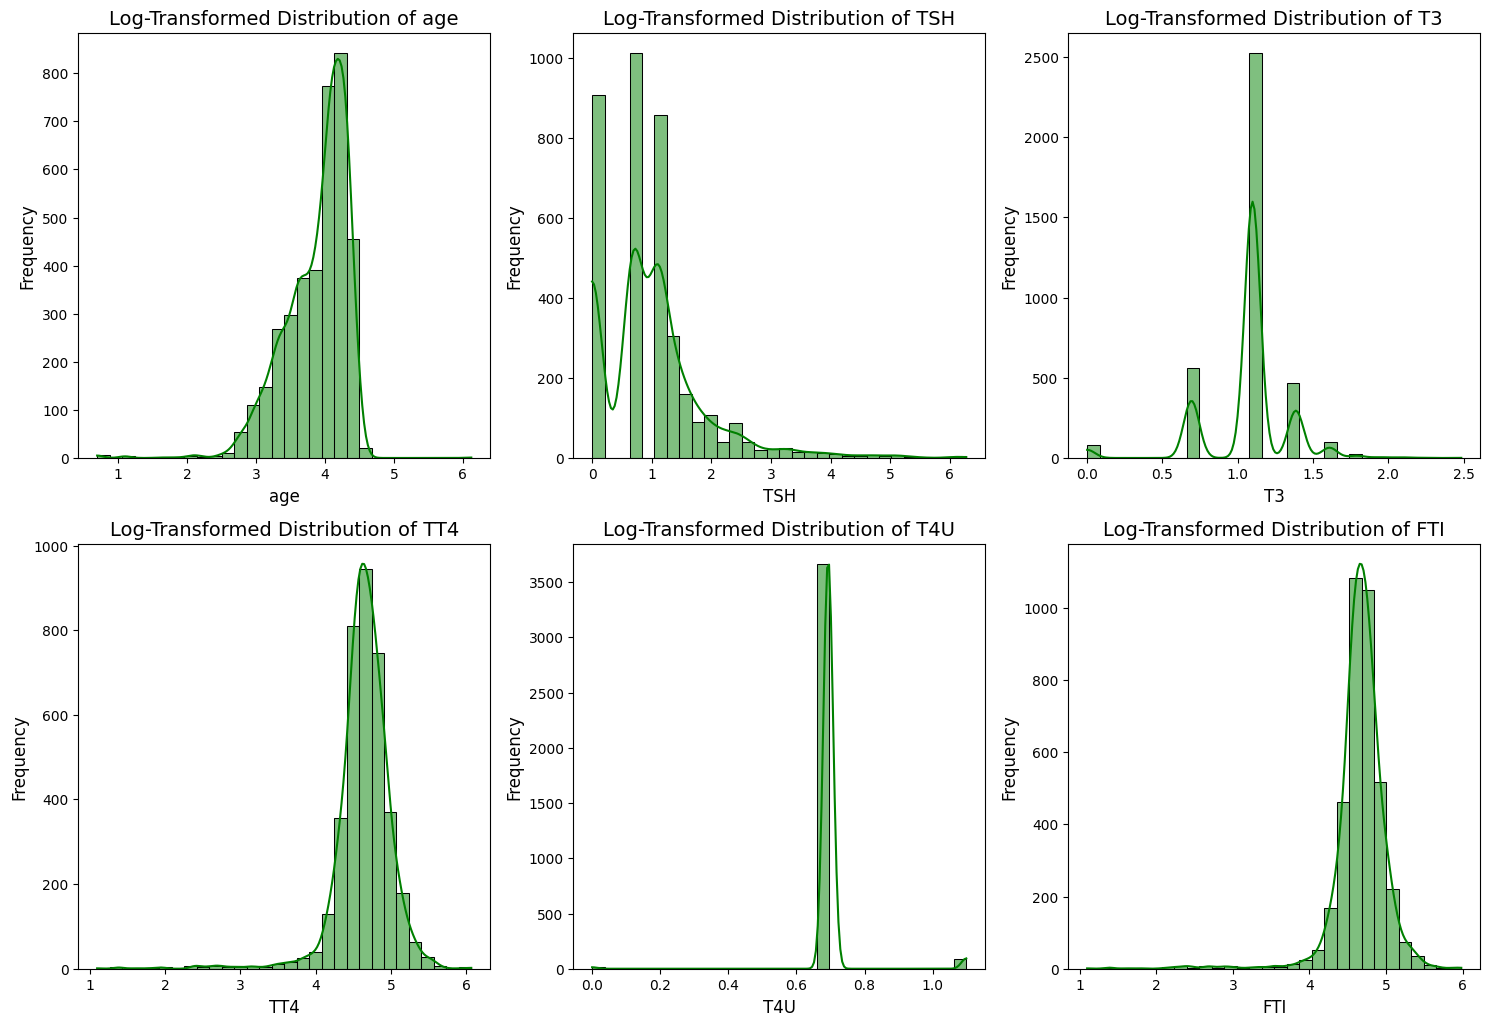

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

columns = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

plt.figure(figsize=(15, 15), facecolor='white')

plot_number = 1

for column in columns:
    new_data[column] += 1
    ax = plt.subplot(3, 3, plot_number)
    sns.histplot(np.log(new_data[column]), kde=True, color='green', bins=30)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Log-Transformed Distribution of {column}', fontsize=14)
    plot_number += 1

plt.tight_layout()
plt.show()


**TSH won't give much of information so let's drop this column**

In [40]:
new_data = new_data.drop(['TSH'], axis = 1)

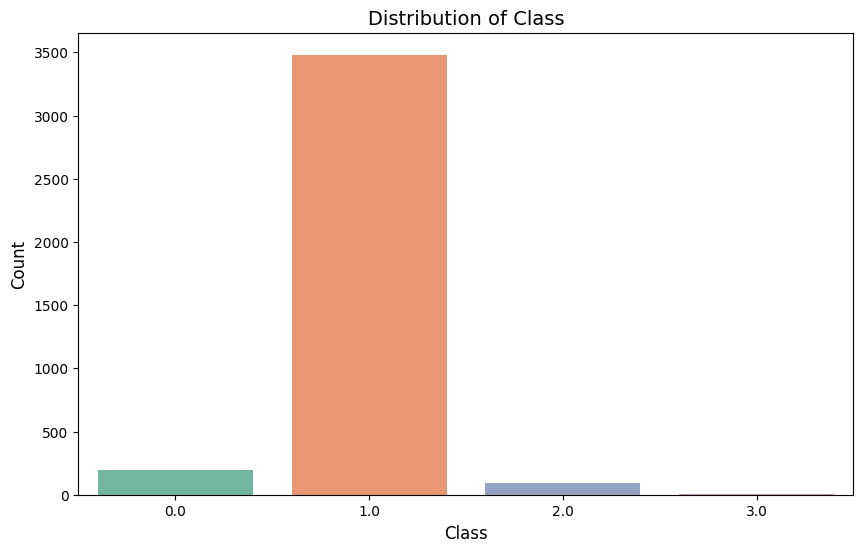

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Set2", n_colors=new_data['Class'].nunique())

plt.figure(figsize=(10, 6), facecolor='white')
sns.countplot(data=new_data, x='Class', palette=palette)

plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Class', fontsize=14)

plt.show()


**We can clerly see that the dataset is highly imbalanced.**

In [42]:
x = new_data.drop(['Class'],axis=1)
y = new_data['Class']

In [44]:
#For balancing the imbalance dataset
from imblearn.over_sampling import SMOTENC,RandomOverSampler,KMeansSMOTE

rdsample = RandomOverSampler()

# Fit the model and resample the data
x_sampled, y_sampled = rdsample.fit_resample(x, y)

In [45]:
#Checking for shape of x_sample
x_sampled.shape

(13924, 15)

In [46]:
#creating dataframe of x_sample
x_sampled = pd.DataFrame(data = x_sampled, columns = x.columns)
x_sampled.head()

,age,sex,on_thyroxine,on_antithyroid_medication,thyroid_surgery,I131_treatment,lithium,goitre,tumor,hypopituitary,psych,T3,TT4,T4U,FTI
0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,126.0,2.0,110.0
1,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,103.0,2.0,109.0
2,47.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,110.0,2.0,121.0
3,71.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,176.0,2.0,178.0
4,71.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,62.0,2.0,71.0


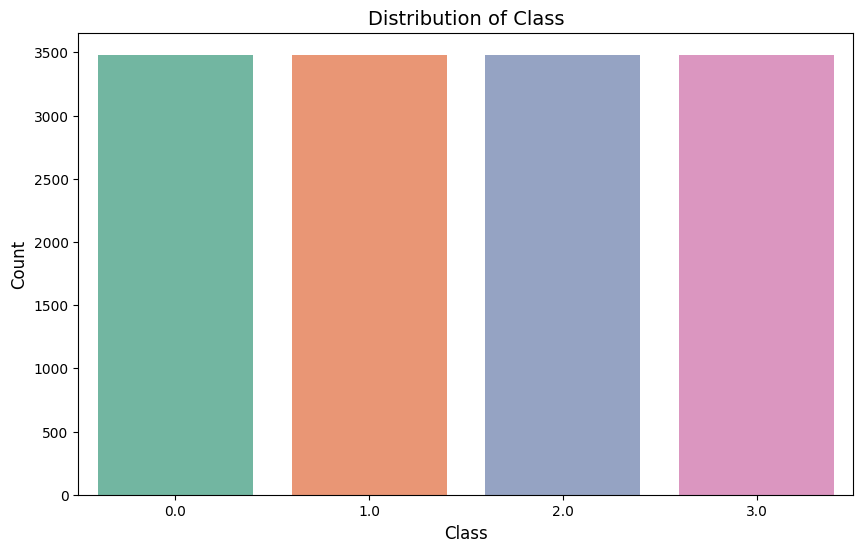

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("Set2", n_colors=new_data['Class'].nunique())

plt.figure(figsize=(10, 6), facecolor='white')
sns.countplot(data=new_data, x=y_sampled, palette=palette)

plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Class', fontsize=14)

plt.show()


**Now dataset is balanced.**

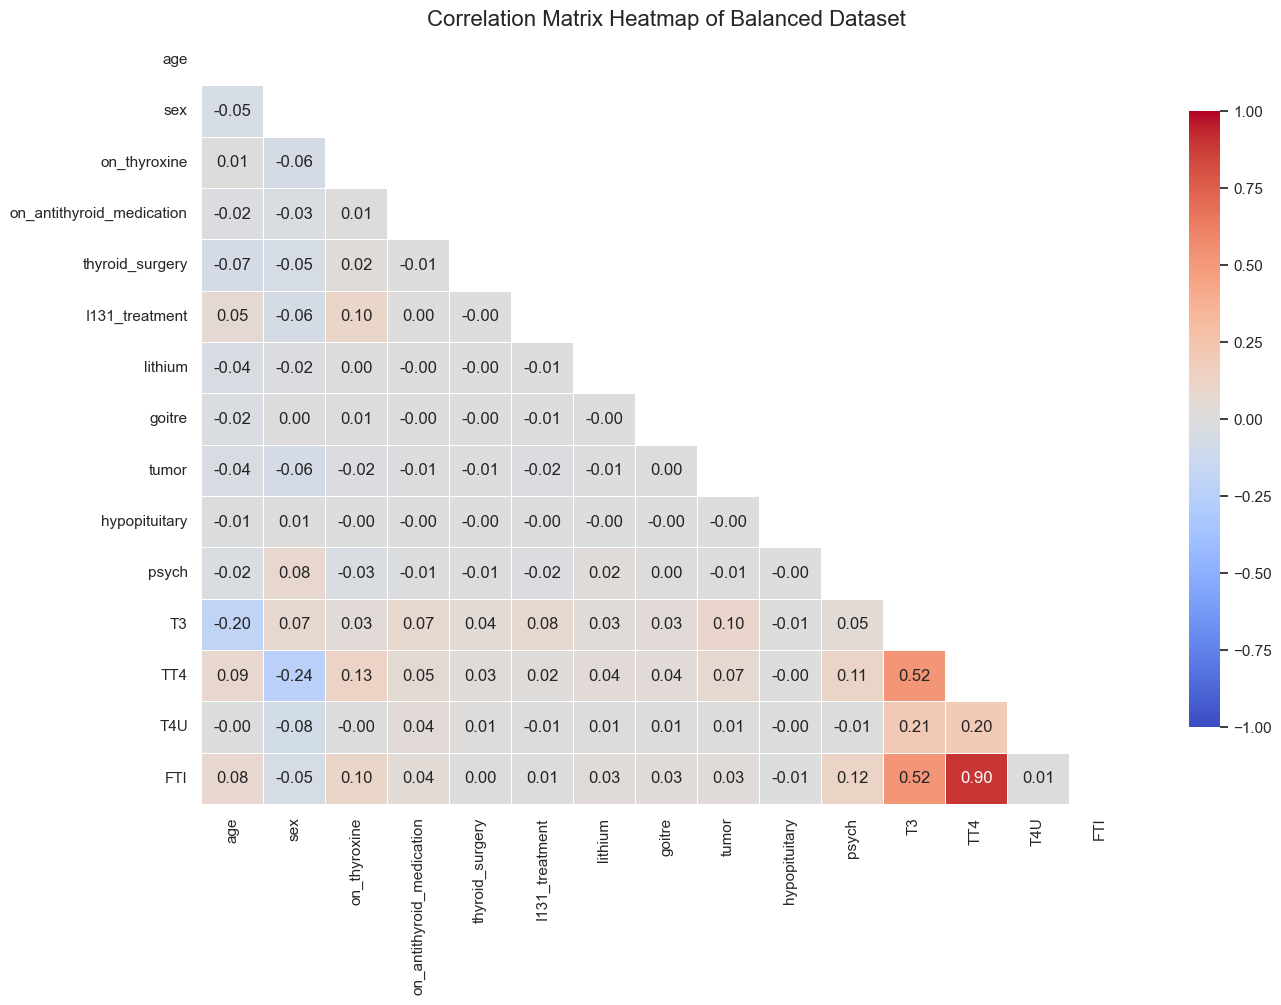

In [50]:
corr_matrix = x_sampled.corr()

plt.figure(figsize=(15, 10), facecolor='white')
sns.set(style='white')

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Matrix Heatmap of Balanced Dataset', fontsize=16)
plt.show()


#### TT4 or FTI, since they are strongly correlated (correlation = 0.90). so drop one of them from dataset.

In [53]:
x_sampled.drop(['TT4'], inplace = True, axis = 1)

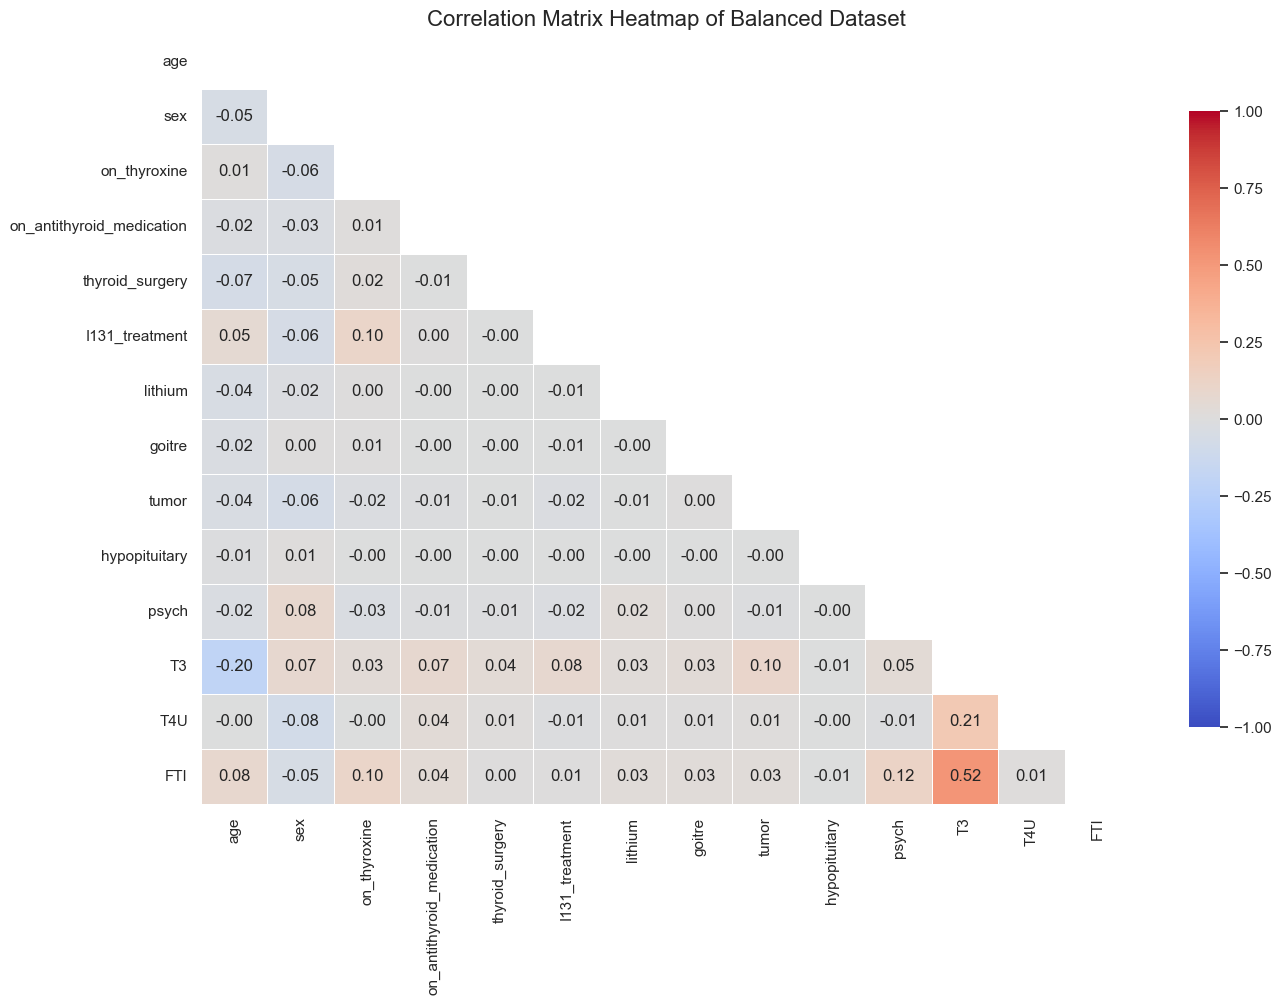

In [54]:
corr_matrix = x_sampled.corr()

plt.figure(figsize=(15, 10), facecolor='white')
sns.set(style='white')

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt='.2f',
    linewidths=0.5,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": .8}
)

plt.title('Correlation Matrix Heatmap of Balanced Dataset', fontsize=16)
plt.show()

In [57]:
#Splitting data into train and test for model building

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_sampled, y_sampled, test_size=0.2, random_state=0)


In [58]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Define a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # You can replace this with other preprocessing steps
    ('clf', RandomForestClassifier(random_state=0))
])

# Define the hyperparameters to tune
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10]
}

In [59]:
# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'clf__max_depth': [None, 10, 20, 30],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [61]:
# Check the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Best Parameters: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best Cross-Validation Accuracy: 0.9839


In [62]:
# Evaluate on the test set
test_accuracy = grid_search.score(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9892


In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def evaluate_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
    
    cm = confusion_matrix(y_test, y_pred)
    
    return acc, precision, recall, f1, roc_auc, cm

def print_classification_results(X_train, X_test, y_train, y_test):
    models = {
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC(probability=True),
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }
    
    results = []
    
    for name, model in models.items():
        acc, precision, recall, f1, roc_auc, cm = evaluate_classifier(model, X_train, X_test, y_train, y_test)
        
        result = (acc, f'{name}:\n'
                      f'Accuracy Score: {acc:.2f}\n'
                      f'Precision: {precision:.2f}\n'
                      f'Recall: {recall:.2f}\n'
                      f'F1 Score: {f1:.2f}\n'
                      f'ROC AUC Score: {roc_auc:.2f}\n'
                      f'Confusion Matrix:\n{cm}')
        
        results.append(result)
    
    for _, res in results:
        print(res)
        print("-" * 100)
    
    best_model = max(results, key=lambda x: x[0])[1]
    print("Best Model:\n")
    print(best_model)

# Example usage
print_classification_results(X_train, X_test, y_train, y_test)


Logistic Regression:
Accuracy Score: 0.79
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
ROC AUC Score: 0.93
Confusion Matrix:
[[454 203   9  35]
 [212 415  10  17]
 [ 12  16 616  71]
 [  0   0   0 715]]
----------------------------------------------------------------------------------------------------
SVM:
Accuracy Score: 0.79
Precision: 0.79
Recall: 0.79
F1 Score: 0.79
ROC AUC Score: 0.95
Confusion Matrix:
[[502 187  12   0]
 [251 388  11   4]
 [ 25  10 595  85]
 [  0   0   0 715]]
----------------------------------------------------------------------------------------------------
KNN:
Accuracy Score: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
ROC AUC Score: 0.99
Confusion Matrix:
[[701   0   0   0]
 [ 96 544  13   1]
 [  0   0 715   0]
 [  0   0   0 715]]
----------------------------------------------------------------------------------------------------
Decision Tree:
Accuracy Score: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
ROC AUC Score: 0.99
Confusion Matrix:
[[701   

### Summary of Results:
- **Random Forest** achieved the highest scores across all metrics:
  - **Accuracy:** 99%
  - **Precision:** 99%
  - **Recall:** 99%
  - **F1 Score:** 99%
  - **ROC AUC Score:** 1.00

  The confusion matrix shows that the Random Forest classifier has a near-perfect classification performance, with minimal misclassifications.


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import NotFittedError
import pickle
import numpy as np
import os

# Initialize and fit the model
classifier_forest = RandomForestClassifier(criterion='entropy', random_state=0)
classifier_forest.fit(X_train, y_train)

# Save the fitted model
artifacts_folder_path = os.path.join('..', 'artifacts')
best_model_filename = os.path.join(artifacts_folder_path, 'Finalized_model.pkl')
os.makedirs(artifacts_folder_path, exist_ok=True)

with open(best_model_filename, 'wb') as file:
    pickle.dump(classifier_forest, file)

# Load the model
with open(best_model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Generate random data
random_data = np.random.rand(1, X_train.shape[1])

# Predict using the loaded model
try:
    prediction = loaded_model.predict(random_data)
    print(f'Prediction for random input: {prediction}')
except NotFittedError as e:
    print(f"Error: {e}")


Prediction for random input: [2.]


In [84]:
features = X_train.columns
len(features)
features

Index(['age', 'sex', 'on_thyroxine', 'on_antithyroid_medication',
       'thyroid_surgery', 'I131_treatment', 'lithium', 'goitre', 'tumor',
       'hypopituitary', 'psych', 'T3', 'T4U', 'FTI'],
      dtype='object')

Mean Accuracy: 0.99


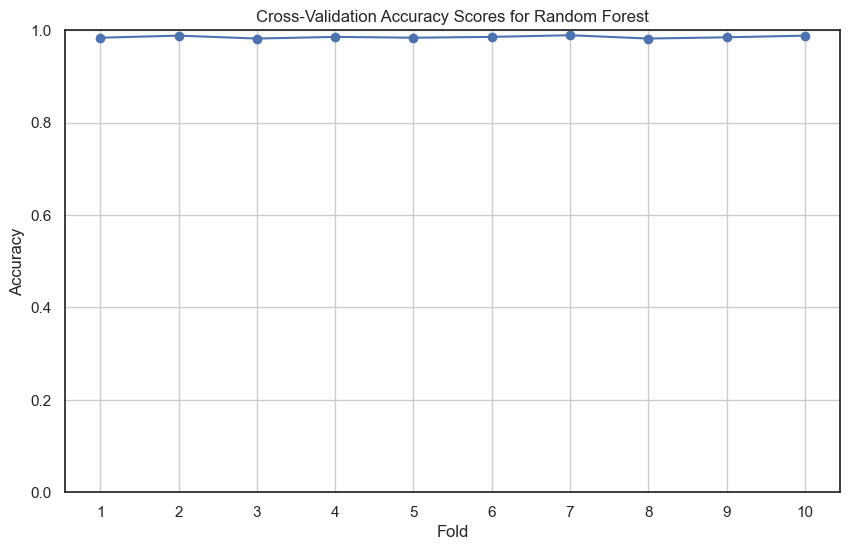

In [85]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

classifier_forest = RandomForestClassifier(criterion='entropy', random_state=0)

accuracies = cross_val_score(estimator=loaded_model, X=X_train, y=y_train, cv=10)

print(f'Mean Accuracy: {accuracies.mean():.2f}')

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores for Random Forest')
plt.xticks(np.arange(1, 11))
plt.ylim(0, 1)
plt.grid(True)

plt.show()
